In [447]:
import os
import numpy as np
import pandas as pd
import keras
import itertools
import time 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tifffile as tiff
import matplotlib
import tensorflow as tf

from IPython.display import display
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import save_img
from keras.callbacks import TensorBoard
from numpy import asarray

from sklearn.metrics import confusion_matrix

from time import strftime

import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from PIL import Image

import cv2

from numpy import genfromtxt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [448]:
directory = 'embryos/0' # File where are all embryo files
interphase_images = []
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    interphase_images.append(image)

In [450]:
len(interphase_images)

122

In [451]:
flatten_list_interphase = []
for img in range(len(interphase_images)):
    flatten_array = pd.Series(interphase_images[img].flatten())
    flatten_list_interphase.append(flatten_array)

In [452]:
df_interphase = pd.DataFrame(flatten_list_interphase)

In [453]:
df_interphase['target'] = 0

In [454]:
directory = 'embryos/1' # File where are all embryo files
mitotic_images = []
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    mitotic_images.append(image)

In [455]:
mitotic_images[0].shape

(256, 256)

In [456]:
flatten_list_mitotic = []
for img in range(1, len(mitotic_images)):
    flatten_array = pd.Series(images[img].flatten())
    flatten_list_mitotic.append(flatten_array)

In [457]:
df_mitotic = pd.DataFrame(flatten_list)

In [458]:
df_mitotic['target'] = 1

In [459]:
df = pd.concat([df_mitotic, df_interphase])

In [460]:
X = df.drop('target', axis=1)
y = df['target']

In [461]:
### Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [462]:
X_train.shape

(106, 65536)

In [463]:
X_test.shape

(53, 65536)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Precision: 0.8 
Accuracy: 0.9245283018867925 
Recall: 0.9230769230769231
F1 Score: 0.8571428571428571


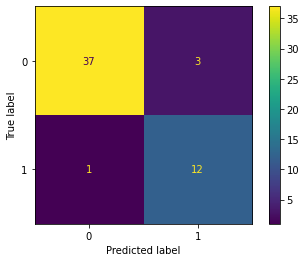

In [464]:
lg = LogisticRegression()

params_lg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}
grid_lg = GridSearchCV(estimator = lg, param_grid=params_lg, cv=3, verbose=1)
model_lg = grid_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_test)
print(f'Precision: {precision_score(y_test, y_pred_lg)} \nAccuracy: {accuracy_score(y_test, y_pred_lg)} \nRecall: {recall_score(y_test, y_pred_lg)}\nF1 Score: {f1_score(y_test, y_pred_lg)}')
plot_confusion_matrix(model_lg, X_test, y_test)

In [439]:
# Save model
from joblib import dump, load
dump(model_lg, 'model_logistic_regression.joblib')

['model_logistic_regression.joblib']